In [1]:


import pickle
import numpy as np
from neuronunit.tests.dynamics import ISITest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  print(mdf1)

from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
cholinergic = {'neuron':'115'}
import neuronunit



plot the analog signal Block/Segment to get information about its length and sampling rate
[<AnalogSignal(array([[-59.111014  , -50.52556666, -52.018056  , ..., -52.21295069,
        -50.05981211, -52.69738065],
       [-59.11543682, -50.57270314, -52.05776716, ..., -52.25169222,
        -50.10926578, -52.73371209],
       [-59.11983763, -50.61960511, -52.09728076, ..., -52.29024102,
        -50.15847341, -52.76986278],
       ..., 
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ],
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ],
       [-60.        , -60.        , -60.        , ..., -60.        ,
        -60.        , -60.        ]]) * mV, [0.0 ms, 3490.1 ms], sampling rate: 10.0 1/ms)>]


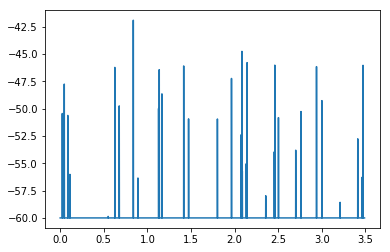

In [2]:
print('plot the analog signal Block/Segment to get information about its length and sampling rate')
print(mdf1.analogsignals)
ass = mdf1.analogsignals[0][143]    
sf = 10 * 1/0.001
dt = float(1.0/sf)
times = np.linspace(0.0,3.4901,4000)

plt.figure()
plt.plot(times, ass)
plt.show()



In [3]:
import pickle
import numpy as np
from neuronunit.tests.dynamics import ISITest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  
  
with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:
  mdf2 = pickle.load(f)
  print(mdf2)

try:
    with open('membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf3 = pickle.load(f)
       print(mdf3)

    with open('membrane_dynamics_file.p','rb') as f:
       mdf = pickle.load(f)

    with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf0 = pickle.load(f)
       print(mdf0)

except:
   pass


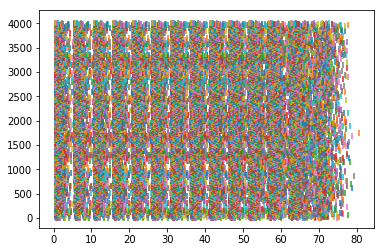

In [4]:

# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
tstop = 100
spike_trains = []

ass = mdf1.analogsignals[0]   
vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()


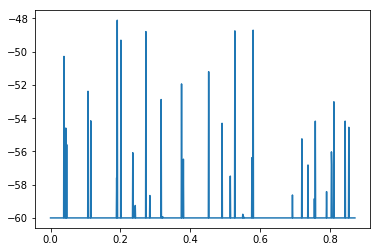

In [5]:

#ass = mdf1.analogsignals[0][0]    
#times = [i for i in range(0,len(vm_spiking[0]))]


plt.figure()
plt.plot(times[0:1000], vm_spiking[43][0:1000])
plt.show()
spiking_memb_pot0 = vm_spiking[20]
spiking_memb_pot1 = vm_spiking[21][0:1000]
spiking_memb_pot0 = vm_spiking[22]
spiking_memb_pot1 = vm_spiking[23]#[0:1000]
spiking_memb_pot1 = vm_spiking[43]

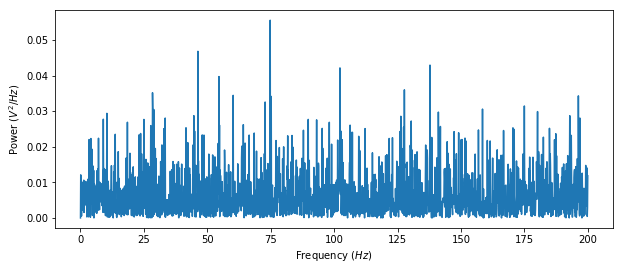

In [6]:
from scipy.signal import periodogram
dt = 0.0025
frequencies, power = periodogram(vm_spiking[43],fs=1/dt)

def plot_periodogram(frequencies,power):
    plt.figure(figsize=(10,4))
    plt.plot(frequencies,power)
    plt.xlabel('Frequency ($Hz$)')
    plt.ylabel('Power ($V^2/Hz$)') # Note that power is now 
                                   # a normalized density
plot_periodogram(frequencies,power)





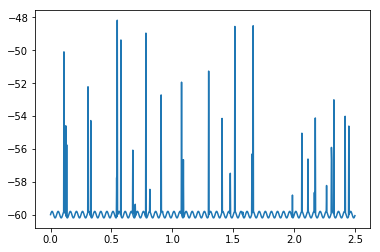

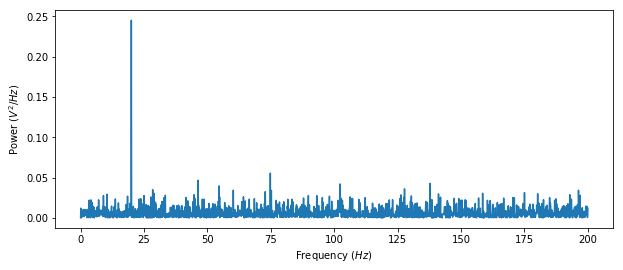

In [7]:

#dt = 0.01 # 1 ms interval between points
T_max = len(vm_spiking[43]) # Signal lasts for 10 seconds
times = np.arange(0,T_max,dt)
N = len(times)
frequency = 20 # Frequency of sinusoid in Hz
offset = 0 # Phase offset in radians
signal = np.array(0.2*np.sin(2*np.pi*frequency*times+offset))

composite_signal = [ float(vm) + signal[i] for i,vm in enumerate(vm_spiking[43])]


plt.figure()
plt.plot(times[0:1000], composite_signal[0:1000])
plt.show()

frequencies, power = periodogram(composite_signal,fs=1/dt)

plot_periodogram(frequencies,power)


In [8]:



from neuronunit.tests.dynamics import ISITest, LocalVariationTest
from neuronunit.tests import fi, dynamics
cholinergic = {'neuron':115}

#observation =  cls.neuroelectro_summary_observation(fi_basket)
test_class_params = [ dynamics.ISITest,
                 dynamics.LocalVariationTest,]#,
'''
params = {}
params['n']=115
neuroelectro.NeuroElectroData.set_neuron('115')
cholinergic = neuroelectro.neuroelectro_summary_observation()
print(cholinergic)
'''
#0.19  ± 0.10


def run_test(t, pred =None):
    import quantities as pq
    from neuronunit.optimization import get_neab
    from neuronunit.models.reduced import ReducedModel
    from neuronunit.tests import base

    
    print(t)
    #test = base.VmTest()
    #if t is not "RheobaseTest":
    observation = {}
    observation['std'] = 0.10*pq.ms
    observation['mean'] = 0.19*pq.ms

    test = t(observation=observation)
    print(test,'test')

    model = ReducedModel(get_neab.LEMS_MODEL_PATH, name= str('vanilla'), backend=('NEURON'))
    score = test.judge(model,stop_on_error = True, deep_error = True)

    return score
for t in test_class_params:
    # try to stop calling generate prediction if prediction already exists
    score = run_test(t,pred =  vm_spiking[43])
    print(score,'score')

Getting Rheobase cached data value for from AIBS dataset 354190013
attempting to recover from pickled file
<class 'neuronunit.tests.dynamics.ISITest'>
mean {'std': array(0.1) * ms, 'mean': array(0.19) * ms}
1.0 s
ISITest test

    Starting simulation in NEURON of 650.0ms generated from NeuroML2 model...

Population RS_pop contains 1 instance(s) of component: RS of type: izhikevich2007Cell
mean {'std': array(10.0) * mV, 'mean': array(110.0) * mV}
1.0 kg*m**2/(s**3*A)
Mechanisms already loaded from path: /home/jovyan/neuronunit/neuronunit/models/NeuroML2.  Aborting.

Mechanisms already loaded from path: /home/jovyan/neuronunit/neuronunit/models/NeuroML2.  Aborting.

    Starting simulation in NEURON of 650.0ms generated from NeuroML2 model...

Population RS_pop contains 1 instance(s) of component: RS of type: izhikevich2007Cell
Mechanisms already loaded from path: /home/jovyan/neuronunit/neuronunit/models/NeuroML2.  Aborting.

    Starting simulation in NEURON of 650.0ms generated from N

KeyError: 'delay'

In [ ]:

#import pdb
#pdb.set_trace()



In [ ]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()